In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score
import sys
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from xgboost import XGBClassifier
import time

In [2]:
df = pd.read_csv('Sales_Data.csv')

In [3]:
df

,|,|__ID,|__Month,|__fy,|__mode,|__Region_State,|__bus
0,2018-2019,1,Feb-2019,2018-2019,THERMAL,All India,89.30048
1,NaN,2,Feb-2019,2018-2019,NUCLEAR,All India,3.17291
2,NaN,3,Feb-2019,2018-2019,HYDRO,All India,8.43584
3,NaN,4,Feb-2019,2018-2019,BHUTAN IMP_Hydro,All India,0.06820
4,NaN,5,Feb-2019,2018-2019,RENEWABLE,All India,11.24518
...,...,...,...,...,...,...,...
222,NaN,220,Oct-2023,2023-2024,THERMAL,All India,117.25864
223,NaN,224,Nov-2023,2023-2024,THERMAL,All India,103.66697
224,NaN,225,Nov-2023,2023-2024,NUCLEAR,All India,4.42449
225,NaN,226,Nov-2023,2023-2024,HYDRO,All India,6.62129


In [4]:
df.rename(columns = {'|__Month':'Month', '|' : 'Year','|__fy':'FY','|__mode':'Mode','|__Region_State':'Region','|__bus' : 'Bus'},inplace = True)

In [5]:
df

,Year,|__ID,Month,FY,Mode,Region,Bus
0,2018-2019,1,Feb-2019,2018-2019,THERMAL,All India,89.30048
1,NaN,2,Feb-2019,2018-2019,NUCLEAR,All India,3.17291
2,NaN,3,Feb-2019,2018-2019,HYDRO,All India,8.43584
3,NaN,4,Feb-2019,2018-2019,BHUTAN IMP_Hydro,All India,0.06820
4,NaN,5,Feb-2019,2018-2019,RENEWABLE,All India,11.24518
...,...,...,...,...,...,...,...
222,NaN,220,Oct-2023,2023-2024,THERMAL,All India,117.25864
223,NaN,224,Nov-2023,2023-2024,THERMAL,All India,103.66697
224,NaN,225,Nov-2023,2023-2024,NUCLEAR,All India,4.42449
225,NaN,226,Nov-2023,2023-2024,HYDRO,All India,6.62129


In [6]:
df1=df.drop(['|__ID','Year','Region'],axis=1)

In [7]:
df1

,Month,FY,Mode,Bus
0,Feb-2019,2018-2019,THERMAL,89.30048
1,Feb-2019,2018-2019,NUCLEAR,3.17291
2,Feb-2019,2018-2019,HYDRO,8.43584
3,Feb-2019,2018-2019,BHUTAN IMP_Hydro,0.06820
4,Feb-2019,2018-2019,RENEWABLE,11.24518
...,...,...,...,...
222,Oct-2023,2023-2024,THERMAL,117.25864
223,Nov-2023,2023-2024,THERMAL,103.66697
224,Nov-2023,2023-2024,NUCLEAR,4.42449
225,Nov-2023,2023-2024,HYDRO,6.62129


In [8]:
print(df1.isnull().sum())

Month    0
FY       0
Mode     0
Bus      0
dtype: int64


<Axes: >

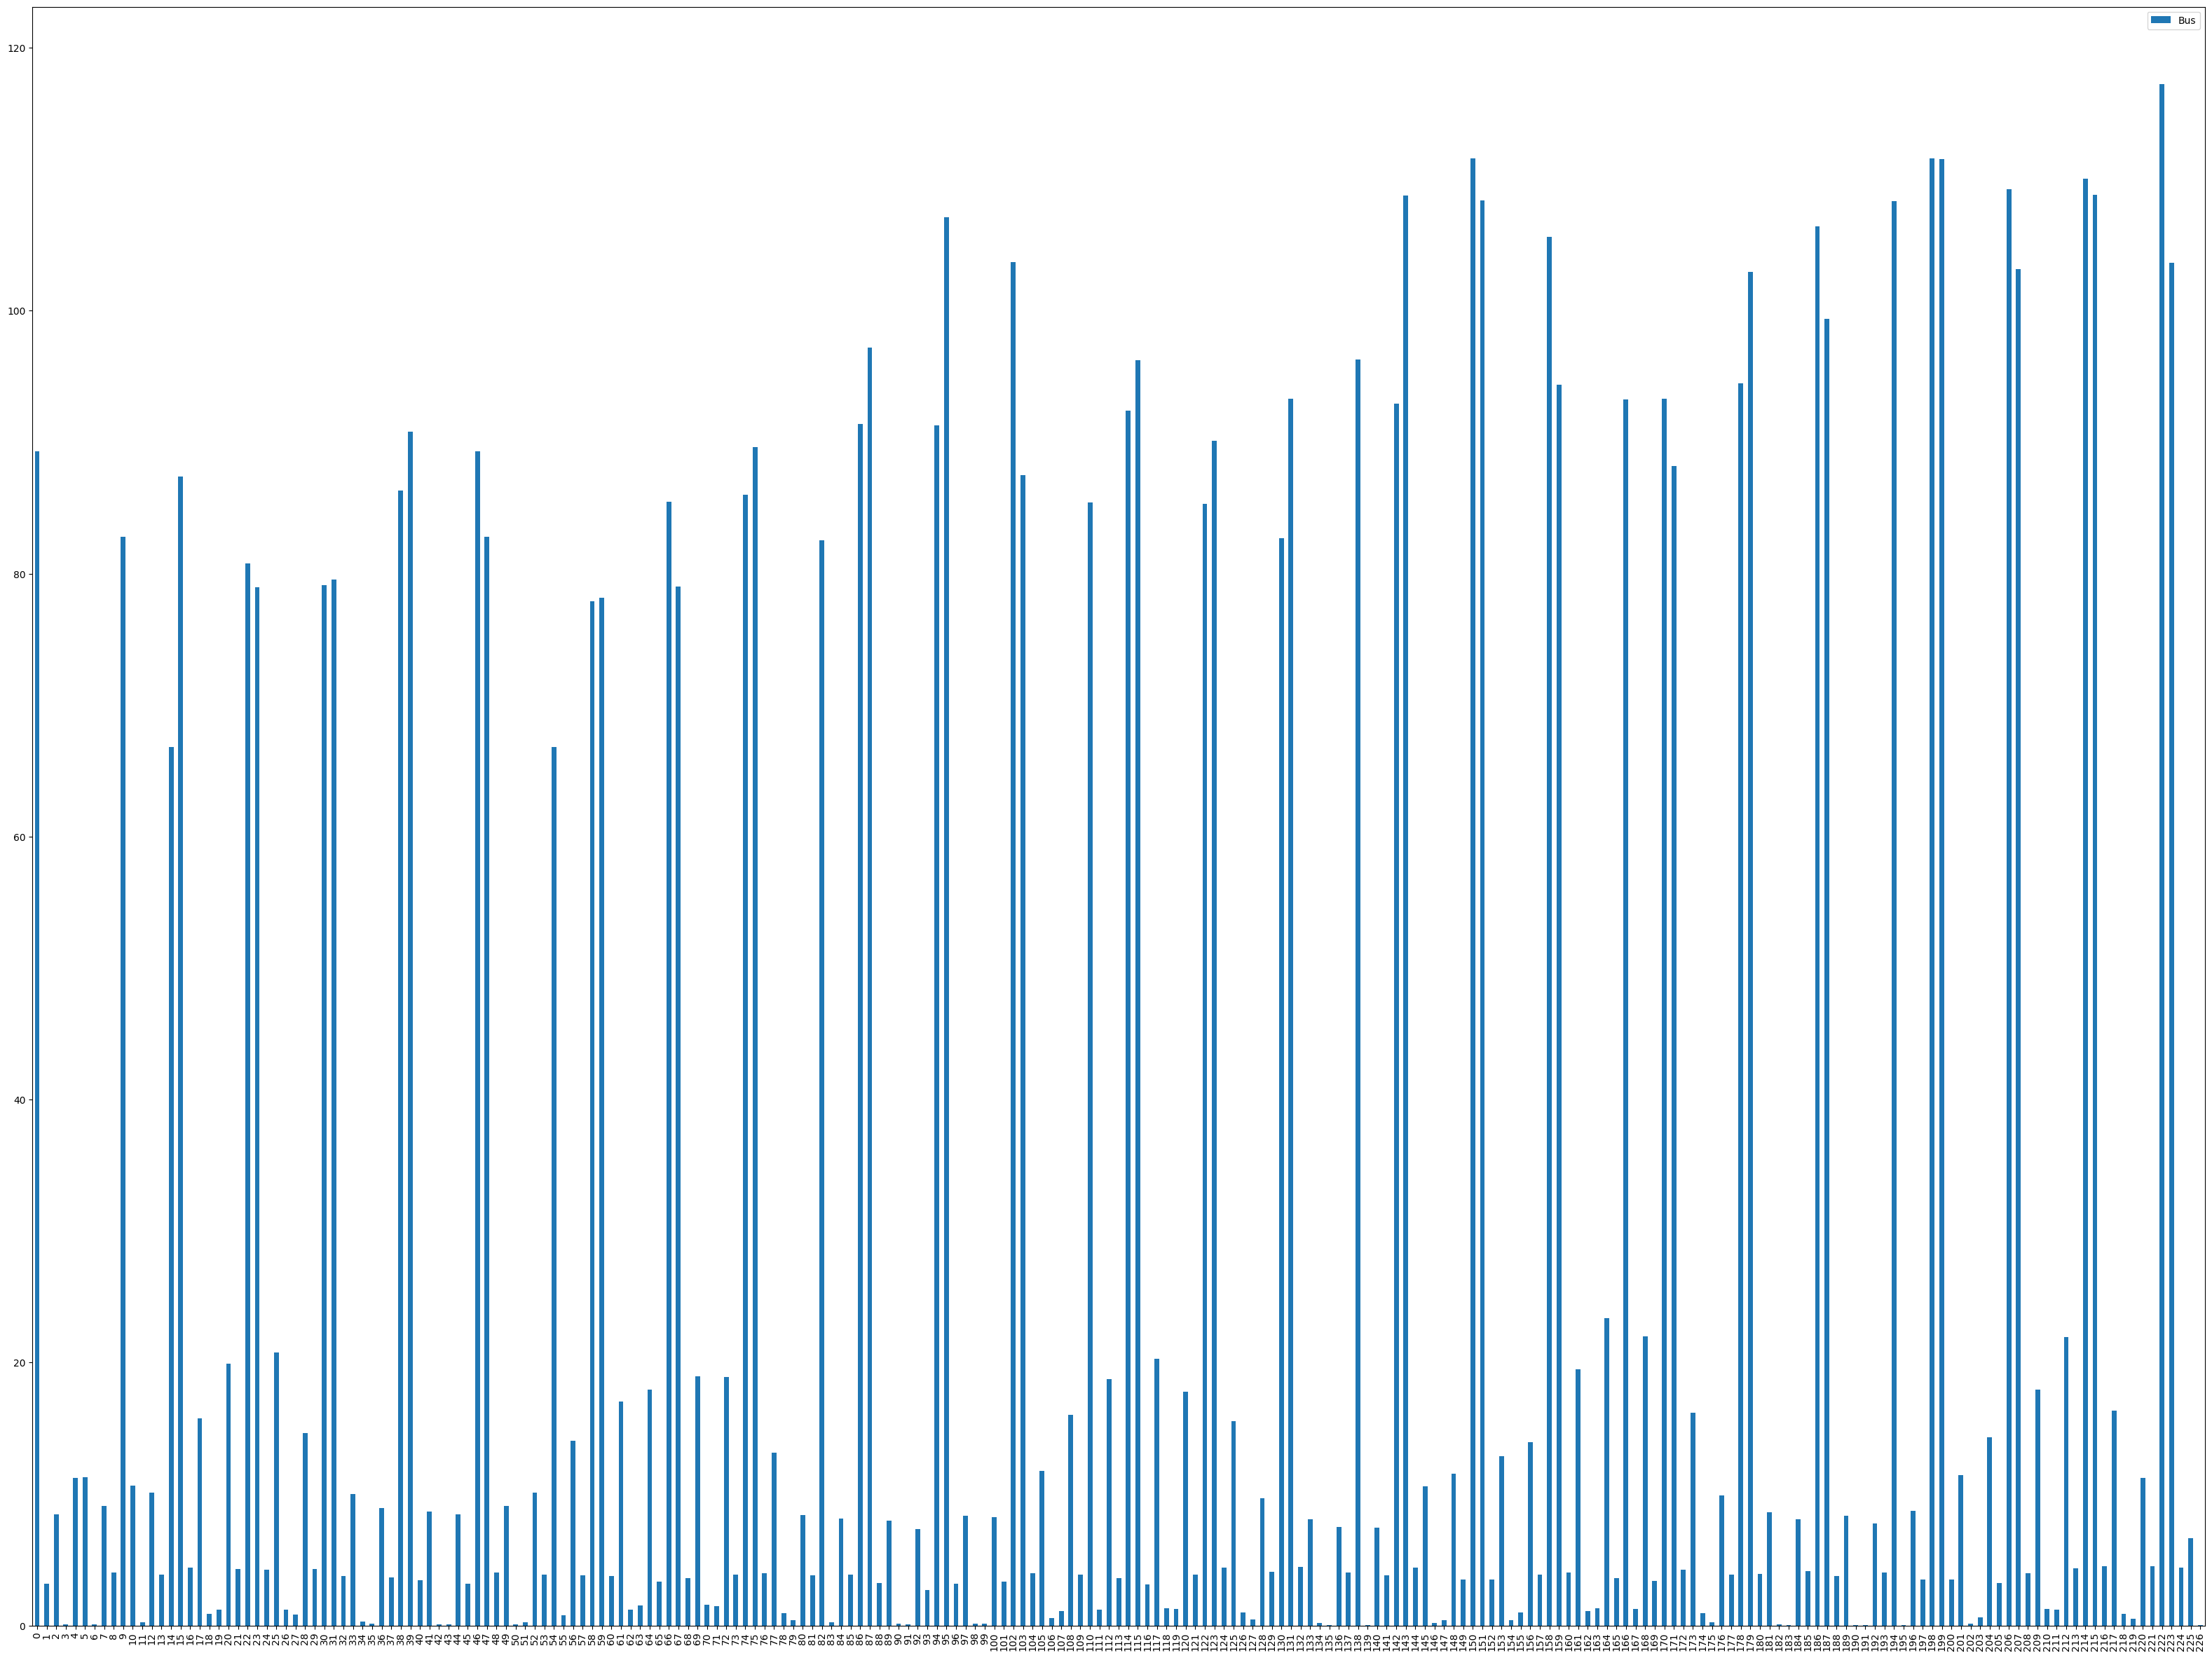

In [9]:
df1.plot(kind="bar", figsize = (40,30))

In [10]:
df1.Mode.value_counts()

THERMAL             56
NUCLEAR             56
HYDRO               56
BHUTAN IMP          53
BHUTAN IMP_Hydro     3
RENEWABLE            3
Name: Mode, dtype: int64

In [11]:
df1.describe()

,Bus
count,227.000000
mean,27.399970
std,38.562918
min,0.016500
25%,2.922350
50%,7.316260
75%,22.710335
max,117.258640


In [12]:
label_encoder = preprocessing.LabelEncoder()
df1['Mode']= label_encoder.fit_transform(df['Mode'])
df1['Mode'].unique()

array([5, 3, 2, 1, 4, 0])

In [13]:
df1

,Month,FY,Mode,Bus
0,Feb-2019,2018-2019,5,89.30048
1,Feb-2019,2018-2019,3,3.17291
2,Feb-2019,2018-2019,2,8.43584
3,Feb-2019,2018-2019,1,0.06820
4,Feb-2019,2018-2019,4,11.24518
...,...,...,...,...
222,Oct-2023,2023-2024,5,117.25864
223,Nov-2023,2023-2024,5,103.66697
224,Nov-2023,2023-2024,3,4.42449
225,Nov-2023,2023-2024,2,6.62129


In [14]:
df1.FY.value_counts()

2020-2021    48
2021-2022    48
2022-2023    48
2019-2020    41
2023-2024    32
2018-2019    10
Name: FY, dtype: int64

In [15]:
df1.Month.value_counts()

Feb-2019    5
Apr-2019    5
Mar-2019    5
Oct-2023    4
Sep-2023    4
Oct-2021    4
Nov-2021    4
Dec-2021    4
Jan-2022    4
Feb-2022    4
Mar-2022    4
Apr-2022    4
May-2022    4
Jun-2022    4
Jul-2022    4
Aug-2022    4
Sep-2022    4
Oct-2022    4
Sep-2021    4
Dec-2022    4
Jan-2023    4
Feb-2023    4
Mar-2023    4
Apr-2023    4
May-2023    4
Jun-2023    4
Jul-2023    4
Aug-2023    4
Nov-2022    4
Aug-2021    4
Jul-2021    4
Jun-2021    4
Jul-2019    4
Aug-2019    4
Sep-2019    4
Oct-2019    4
Nov-2019    4
Dec-2019    4
Jan-2020    4
Feb-2020    4
Mar-2020    4
Apr-2020    4
May-2020    4
Jun-2020    4
Jul-2020    4
Aug-2020    4
Sep-2020    4
Oct-2020    4
Nov-2020    4
Dec-2020    4
Jan-2021    4
Feb-2021    4
Mar-2021    4
Apr-2021    4
May-2021    4
Nov-2023    4
Name: Month, dtype: int64

In [16]:
df1['FY']= label_encoder.fit_transform(df['FY'])
df1['FY'].unique()

array([0, 1, 2, 3, 4, 5])

In [17]:
df1

,Month,FY,Mode,Bus
0,Feb-2019,0,5,89.30048
1,Feb-2019,0,3,3.17291
2,Feb-2019,0,2,8.43584
3,Feb-2019,0,1,0.06820
4,Feb-2019,0,4,11.24518
...,...,...,...,...
222,Oct-2023,5,5,117.25864
223,Nov-2023,5,5,103.66697
224,Nov-2023,5,3,4.42449
225,Nov-2023,5,2,6.62129


In [18]:
df1.FY.value_counts()

2    48
3    48
4    48
1    41
5    32
0    10
Name: FY, dtype: int64

In [19]:
df1['Month']= label_encoder.fit_transform(df['Month'])
df1['Month'].unique()

array([14, 32,  0, 23,  5, 51, 46, 41, 10, 19, 15, 33,  1, 37, 28, 24,  6,
       52, 47, 42, 11, 20, 16, 34,  2, 38, 29, 25,  7, 53, 48, 43, 12, 21,
       17, 35,  3, 39, 30, 26,  8, 54, 49, 44, 13, 22, 18, 36,  4, 40, 31,
       27,  9, 55, 50, 45])

In [20]:
df1

,Month,FY,Mode,Bus
0,14,0,5,89.30048
1,14,0,3,3.17291
2,14,0,2,8.43584
3,14,0,1,0.06820
4,14,0,4,11.24518
...,...,...,...,...
222,50,5,5,117.25864
223,45,5,5,103.66697
224,45,5,3,4.42449
225,45,5,2,6.62129


In [21]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df1)
standard_df = pd.DataFrame(standard_df)

In [22]:
standard_df

,0,1,2,3
0,-0.824107,-1.942394,1.382788,1.608730
1,-0.824107,-1.942394,0.261742,-0.629636
2,-0.824107,-1.942394,-0.298781,-0.492858
3,-0.824107,-1.942394,-0.859304,-0.710324
4,-0.824107,-1.942394,0.822265,-0.419846
...,...,...,...,...
222,1.400002,1.540414,1.382788,2.335333
223,1.091098,1.540414,1.382788,1.982100
224,1.091098,1.540414,0.261742,-0.597109
225,1.091098,1.540414,-0.298781,-0.540016


In [23]:
standard_df.columns = ['Month', 'FY', 'Mode','Bus']

In [24]:
standard_df

,Month,FY,Mode,Bus
0,-0.824107,-1.942394,1.382788,1.608730
1,-0.824107,-1.942394,0.261742,-0.629636
2,-0.824107,-1.942394,-0.298781,-0.492858
3,-0.824107,-1.942394,-0.859304,-0.710324
4,-0.824107,-1.942394,0.822265,-0.419846
...,...,...,...,...
222,1.400002,1.540414,1.382788,2.335333
223,1.091098,1.540414,1.382788,1.982100
224,1.091098,1.540414,0.261742,-0.597109
225,1.091098,1.540414,-0.298781,-0.540016


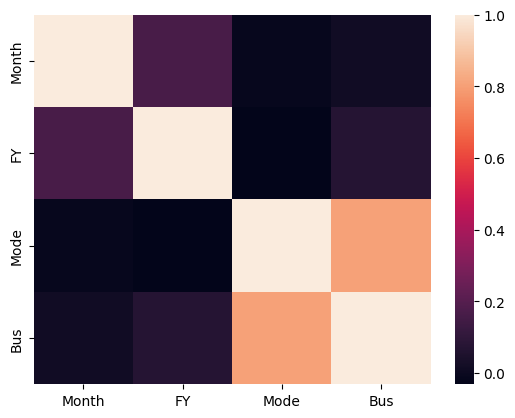

In [25]:
dataplot=sns.heatmap(standard_df.corr())

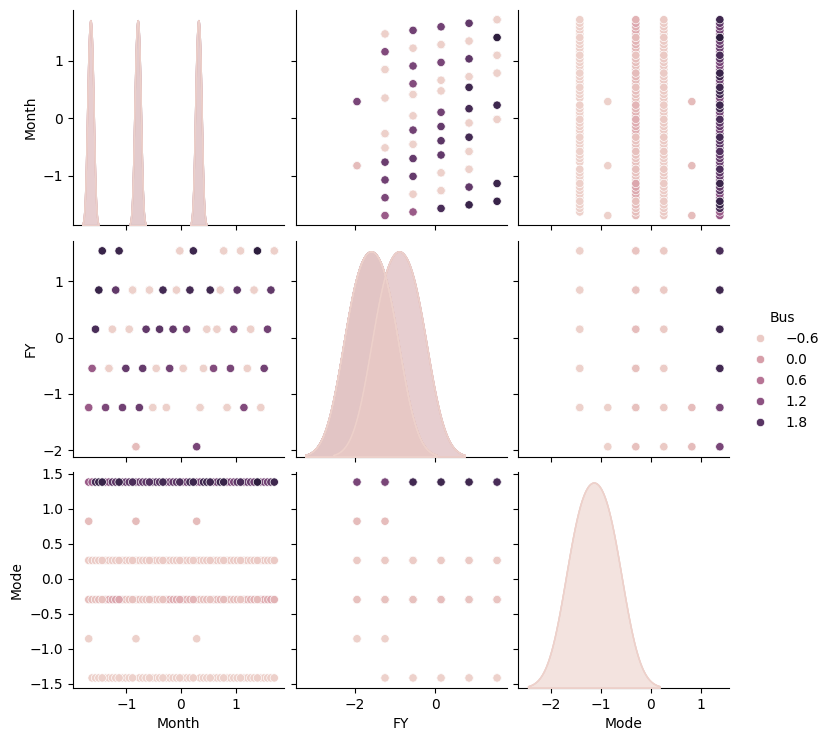

In [26]:
sns.pairplot(standard_df, hue='Bus' )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

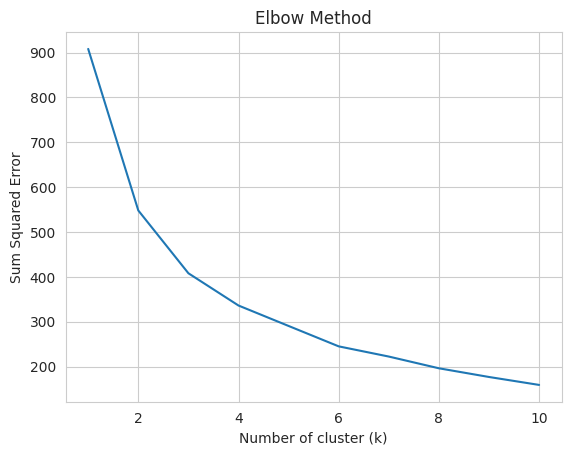

In [27]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(standard_df)
    sse.append(km.inertia_)
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [28]:
kmeans = KMeans(n_clusters = 2, random_state = 2)
kmeans.fit(standard_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=2)

In [29]:
kmeans.cluster_centers_

array([[-0.00325321, -0.00750091, -0.45284276, -0.56055326],
       [ 0.00993392,  0.02290456,  1.38278771,  1.71168941]])

In [30]:
pred = kmeans.fit_predict(standard_df)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0], dtype=int32)

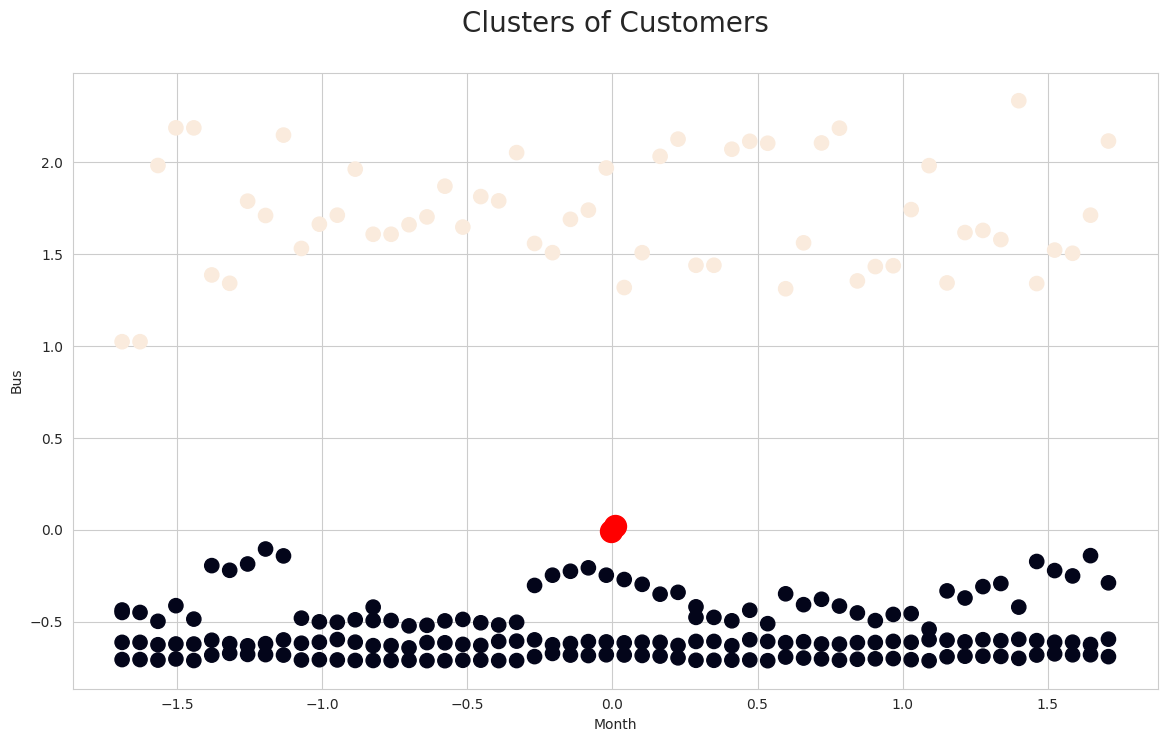

In [31]:
plt.figure(figsize = (14, 8))

plt.scatter(standard_df['Month'], standard_df['Bus'], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Month')
plt.ylabel('Bus')
plt.show()

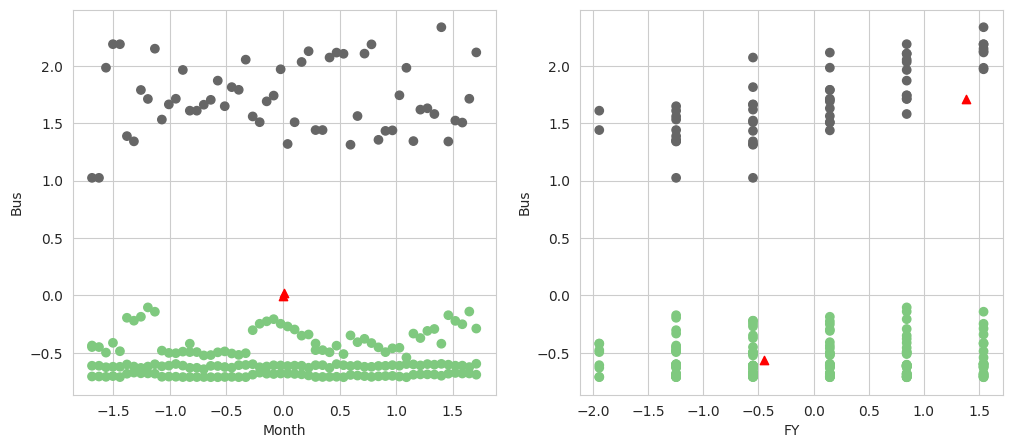

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(standard_df['Month'], standard_df['Bus'],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("Month")
plt.ylabel("Bus")

plt.subplot(1,2,2)
plt.scatter(standard_df['FY'], standard_df['Bus'],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("FY")
plt.ylabel("Bus")
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(standard_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2)

In [34]:
kmeans.cluster_centers_

array([[ 0.86356358,  0.35965688, -0.49701462, -0.55507233],
       [ 0.00993392,  0.02290456,  1.38278771,  1.71168941],
       [-0.8018934 , -0.34578112, -0.41214509, -0.56560309]])

In [35]:
pred = kmeans.fit_predict(standard_df)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0], dtype=int32)

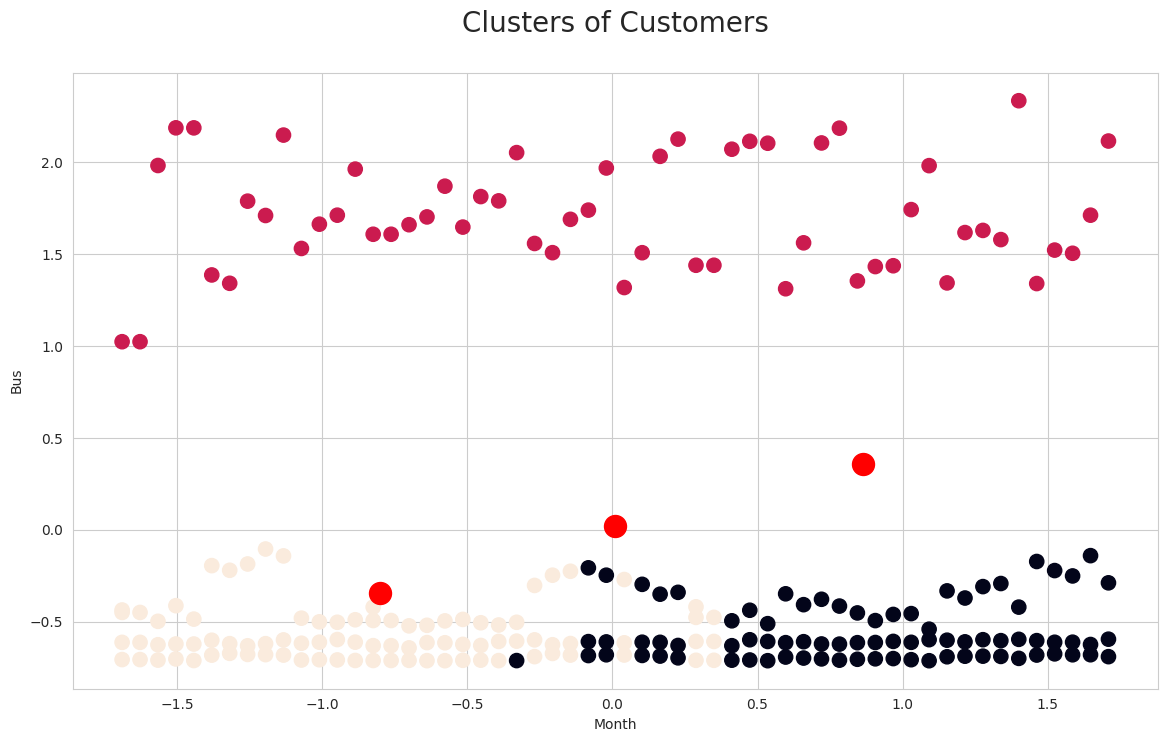

In [36]:
plt.figure(figsize = (14, 8))

plt.scatter(standard_df['Month'], standard_df['Bus'], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Month')
plt.ylabel('Bus')
plt.show()

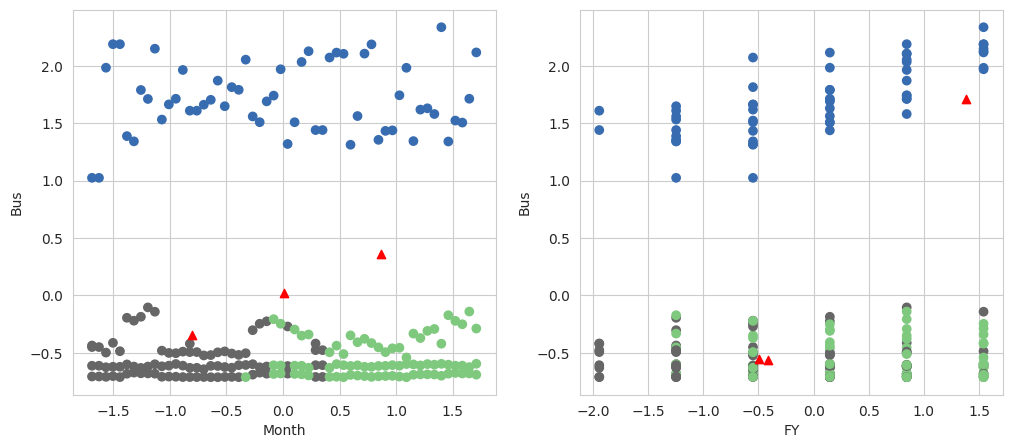

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(standard_df['Month'], standard_df['Bus'],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("Month")
plt.ylabel("Bus")

plt.subplot(1,2,2)
plt.scatter(standard_df['FY'], standard_df['Bus'],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("FY")
plt.ylabel("Bus")
plt.show()

In [38]:
silhouette = silhouette_score(standard_df, kmeans.labels_)
db_index = davies_bouldin_score(standard_df, kmeans.labels_)
ch_index = calinski_harabasz_score(standard_df, kmeans.labels_)

In [39]:
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.32
Davies-Bouldin Index: 1.20
Calinski-Harabasz Index: 137.21


In [40]:
## DBSCAN

In [41]:
df2=standard_df.iloc[:, [2,3]].values

In [42]:
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(df2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

np.unique(labels)

array([-1,  0,  1,  2,  3])

In [43]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['y', 'b', 'g', 'r']


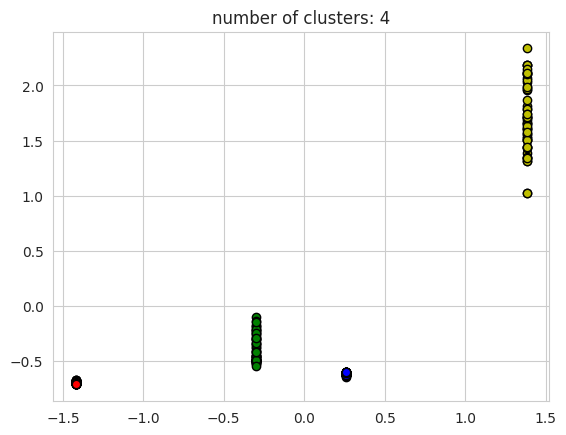

In [44]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = df2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = df2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [45]:
sc = metrics.silhouette_score(df2, labels)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.86


In [46]:
db_index = davies_bouldin_score(standard_df, labels)
ch_index = calinski_harabasz_score(standard_df, labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Davies-Bouldin Index: 2.63
Calinski-Harabasz Index: 58.36


In [47]:
standard_df['FalseDataInjection'] = np.random.randint(2, size=len(standard_df))

In [48]:
standard_df

,Month,FY,Mode,Bus,FalseDataInjection
0,-0.824107,-1.942394,1.382788,1.608730,1
1,-0.824107,-1.942394,0.261742,-0.629636,0
2,-0.824107,-1.942394,-0.298781,-0.492858,1
3,-0.824107,-1.942394,-0.859304,-0.710324,0
4,-0.824107,-1.942394,0.822265,-0.419846,1
...,...,...,...,...,...
222,1.400002,1.540414,1.382788,2.335333,0
223,1.091098,1.540414,1.382788,1.982100,1
224,1.091098,1.540414,0.261742,-0.597109,1
225,1.091098,1.540414,-0.298781,-0.540016,1


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image

Accuracy: 0.50
Precision: 0.50
Confusion Matrix:
[[ 0 23]
 [ 0 23]]


<Axes: >

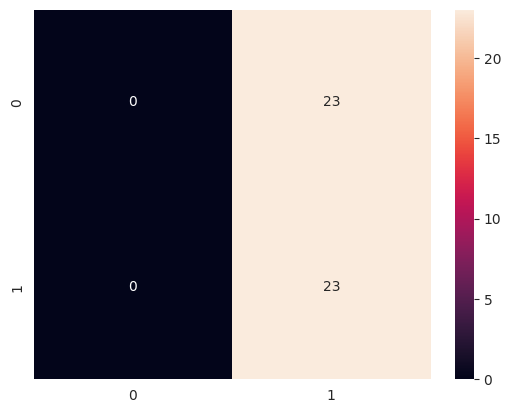

In [50]:
# Import the required modules
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Select the features for SVM
features = ['Month','FY','Mode','Bus']

# Split the data into X (features) and y (target)
X = standard_df[features]
y = standard_df['FalseDataInjection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifier with linear kernel
clf = svm.SVC(kernel='linear')

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy and precision of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy: %.2f" % accuracy)
print("Precision: %.2f" % precision)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='g')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
clfr = DecisionTreeClassifier()

In [53]:
clfr.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = clf.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5


In [56]:
importance = clfr.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i],v))

Feature: Month, Score: 0.24915
Feature: FY, Score: 0.15702
Feature: Mode, Score: 0.03730
Feature: Bus, Score: 0.55653


In [58]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 58.70


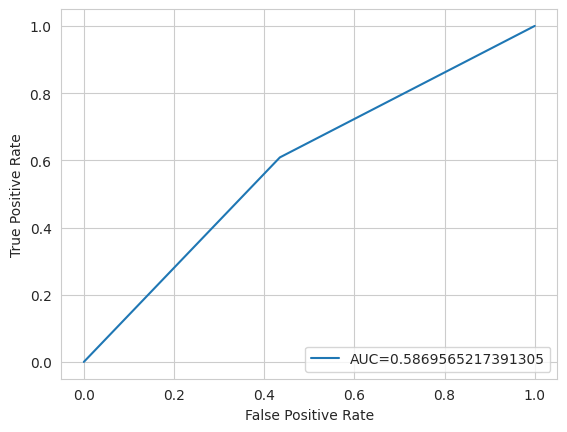

In [59]:
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()